In [251]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections

df = pd.read_csv('ReadyPragAirBnB.csv',sep=';', index_col=0)
df.head(5)

,RoomID,Name,HostID,Neighbourhood,RoomType,Price,MinNights,NumReviews,RoomsPerHost,Availibility,Location,Latitude,Longtitude,PriceCategory
0,25092602,❤️AMAZING APARTMENT WITH NETFLIX NEAR CENTRE❤️,189676842,Praha 3,Entire home/apt,1310,1,79,1,172,"Czech republic, Prague, Praha 3",50.086376,14.444495,nízká
1,25197350,Room in beautiful area close to Prague Castle,28365945,Praha 6,Private room,763,1,2,1,0,"Czech republic, Prague, Praha 6",50.083104,14.369196,nízká
2,25470062,Luxury apartment in the center of Prague,47717433,Praha 2,Entire home/apt,1071,2,84,1,109,"Czech republic, Prague, Praha 2",50.073298,14.439128,nízká
3,25547218,Much More For Your Money In Beautiful Letná,21217319,Praha 7,Entire home/apt,2074,1,21,1,0,"Czech republic, Prague, Praha 7",50.102008,14.417981,střední
4,25907826,Apartment near city transport and Prague center,119497941,Praha 4,Entire home/apt,2504,1,16,1,0,"Czech republic, Prague, Praha 4",50.057750,14.450172,střední


In [347]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lrDf = pd.DataFrame(data=df)
lrDf.drop(['Name','RoomID','Location','PriceCategory'],axis=1,inplace=True)


le = preprocessing.LabelEncoder()
le.fit(df['Neighbourhood'])
lrDf['Neighbourhood']=le.transform(lrDf['Neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(lrDf['RoomType'])
lrDf['RoomType']=le.transform(lrDf['RoomType'])

lrDf.sort_values(by='Price',ascending=True,inplace=True)

lrDf.head()

,HostID,Neighbourhood,RoomType,Price,MinNights,NumReviews,RoomsPerHost,Availibility,Latitude,Longtitude
175,311957181,27,1,0,1,0,1,0,50.074422,14.430424
1511,304235499,36,1,0,1,0,1,0,50.095081,14.453803
3280,311984646,33,1,0,1,0,1,0,50.069834,14.410105
5723,311953210,27,1,0,1,0,1,0,50.072518,14.429431
2630,119088430,20,3,24,1,0,1,0,50.050168,14.347674


In [112]:
len(lrDf)

12565

In [348]:
from scipy import stats
z_scores = stats.zscore(lrDf)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
ready_df = lrDf[filtered_entries]

print(ready_df)

          HostID  Neighbourhood  RoomType  Price  MinNights  NumReviews  \
175    311957181             27         1      0          1           0   
1511   304235499             36         1      0          1           0   
3280   311984646             33         1      0          1           0   
5723   311953210             27         1      0          1           0   
11627  134919847             36         2    191          1           1   
...          ...            ...       ...    ...        ...         ...   
12241  175885315             27         0  40001          4           1   
2249   247585169             27         0  40096          2          20   
1039   336295257             16         0  40096          5           0   
6791     4348684             16         0  42798          3           0   
5236    28701824             27         0  46810          1           0   

       RoomsPerHost  Availibility   Latitude  Longtitude  
175               1             0  50.07

In [349]:

X = ready_df[['Neighbourhood','Latitude','Longtitude','RoomType','MinNights','NumReviews','RoomsPerHost','Availibility']]
y = ready_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [281]:
#Lineární regrese

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predicts = lm.predict(X_test)

In [297]:

lrPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': predicts.flatten()})
lrPred.head(30)

,ActualValues,PredictedValues
0,1001,3453.121130
1,500,2839.493616
2,1571,3028.740483
3,2000,2309.309537
4,1502,2383.202649
5,810,2329.307203
6,1452,61.908773
7,1048,3752.309249
8,1788,2106.399580
9,1001,2059.854216


In [299]:
print('mse: ', mean_squared_error(y_test, predicts))

rmse = np.sqrt(np.mean(predicts - y_test)**2)
print('rmse: ', rmse)

r2 = r2_score(lrPred.ActualValues, lrPred.PredictedValues)
print('r2 score: ', r2)

mse:  11275780.173027951
rmse:  166.1866616597537
r2 score:  0.08100379041530803


In [305]:
from sklearn.metrics import mean_absolute_error
print('mse: ', mean_absolute_error(y_test, predicts))

mse:  1807.5103198127897


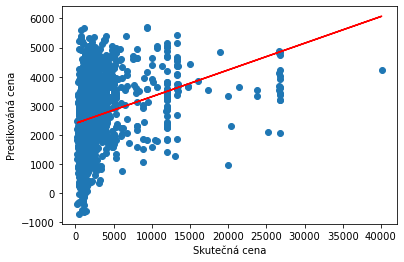

<Figure size 432x288 with 0 Axes>

In [303]:
plt.scatter(y_test, predicts)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, predicts, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()
plt.savefig('LinRegPlot.png', dpi=1500)

rmse:  171.02285976252836
r2 score:  0.052649218065108694


In [39]:
limitedDf = lrDf[lrDf.Price < 15000]
limitedDf.head(5)

,HostID,Neighbourhood,RoomType,Price,MinNights,NumReviews,RoomsPerHost,Availibility,Latitude,Longtitude
175,311957181,27,1,0,1,0,1,0,50.074422,14.430424
1511,304235499,36,1,0,1,0,1,0,50.095081,14.453803
3280,311984646,33,1,0,1,0,1,0,50.069834,14.410105
5723,311953210,27,1,0,1,0,1,0,50.072518,14.429431
2630,119088430,20,3,24,1,0,1,0,50.050168,14.347674


In [324]:
lm = LinearRegression()

X = limitedDf[['HostID','Neighbourhood','Latitude','Longtitude','RoomType','MinNights','NumReviews','RoomsPerHost','Availibility']]
y = limitedDf['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [276]:
predicts = lm.predict(X_test)
lrPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': predicts.flatten()})
lrPred.head(30)

,ActualValues,PredictedValues
0,1001,2607.123712
1,500,2706.004632
2,1571,3075.558070
3,2000,2545.007487
4,1502,2404.219463
5,810,2705.721281
6,1452,2064.233243
7,1048,4179.110479
8,1788,2110.285570
9,1001,2046.088779


In [277]:
rmse = np.sqrt(np.mean(predicts - y_test)**2)
print('rmse: ', rmse)

r2 = r2_score(lrPred.ActualValues, lrPred.PredictedValues)
print('r2 score: ', r2)

rmse:  171.02285976252836
r2 score:  0.052649218065108694


<AxesSubplot:xlabel='Actual Values', ylabel='Predicted Values'>

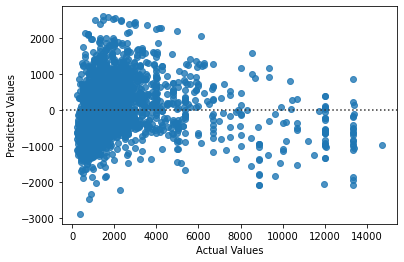

In [42]:
import seaborn as sns
sns.residplot(x=lrPred['Actual Values'],y=lrPred['Predicted Values'])

In [329]:
#xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBRegressor()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   10.5s finished


[23:55:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E410E03A08>,
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E410B92848>,
                                        'subsample': [0.6, 0.8, 1.0, 2]},
                   random_state=1001, verbose=3)

In [169]:
from sklearn.metrics import mean_squared_error, r2_score

In [330]:

y_pred = rs.best_estimator_.predict(X_test)


mse : 3105.779743087475


In [331]:
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
print('rmse: ', rmse)


print('mae: ', mean_absolute_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
print('r2 score: ', r2)

rmse:  41.819005856446
mae:  1009.4869186061463
r2 score:  0.49508449626969253


In [232]:
xgBoostPred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred})
xgBoostPred.head(30)

,Actual Values,Predicted Values
0,1001,263.807129
1,500,346.946533
2,1571,2192.012207
3,2000,4726.982910
4,1502,1674.408691
5,810,4288.340820
6,1452,3692.658936
7,1048,1764.893066
8,1788,2642.229980
9,1001,1792.494873


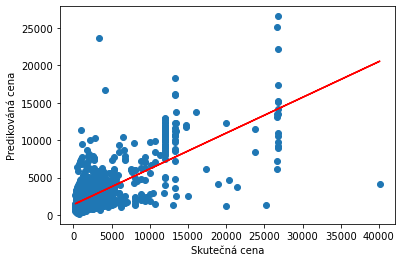

In [197]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [317]:
underDf = ready_df
underDf.drop(['MinNights','NumReviews','RoomsPerHost','Availibility'], axis=1, inplace=True)
underDf.head(5)              


C:\Users\mates\anaconda3\envs\bpEnv\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HostID,Neighbourhood,RoomType,Price,Latitude,Longtitude
175,311957181,27,1,0,50.074422,14.430424
1511,304235499,36,1,0,50.095081,14.453803
3280,311984646,33,1,0,50.069834,14.410105
5723,311953210,27,1,0,50.072518,14.429431
11627,134919847,36,2,191,50.129942,14.470113


In [319]:
X = underDf[['Neighbourhood','Latitude','Longtitude','RoomType',]]
y = underDf['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [320]:
lm.fit(X_train,y_train)
predicts = lm.predict(X_test)

In [321]:
rmse = np.sqrt(np.mean(predicts - y_test)**2)
print('rmse: ', rmse)


print('mae: ', mean_absolute_error(y_test, predicts))

r2 = r2_score(y_test, predicts)
print('r2 score: ', r2)

rmse:  164.8951256471114
mae:  1814.6991798728743
r2 score:  0.04511762688487475


In [345]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)

model=regressor.fit(X_train, y_train)  
y1 = model.predict(X_test)


In [346]:
mse = mean_squared_error(y_test, y1)
print('mse: ', mse)

rmse = np.sqrt(np.mean(y1 - y_test)**2)
print('rmse: ', rmse)

r2 = r2_score(y_test, y1)
print('r2 score: ', r2)

print('mae: ', mean_absolute_error(y_test, y1))

mse:  7868330.931079429
rmse:  213.8330457038391
r2 score:  0.3587169853916893
mae:  1399.5222669104205


In [257]:

rfPred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y1})
rfPred.head(30)

,Actual Values,Predicted Values
0,1001,4341.172
1,500,1412.804
2,1571,3754.508
3,2000,1292.412
4,1502,1571.896
5,810,7525.284
6,1452,1800.756
7,1048,2839.332
8,1788,1570.012
9,1001,1538.824


<AxesSubplot:xlabel='Actual Values', ylabel='Predicted Values'>

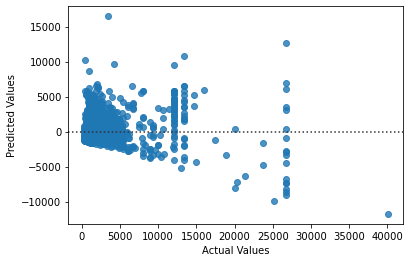

In [258]:
sns.residplot(x=rfPred['Actual Values'],y=rfPred['Predicted Values'])

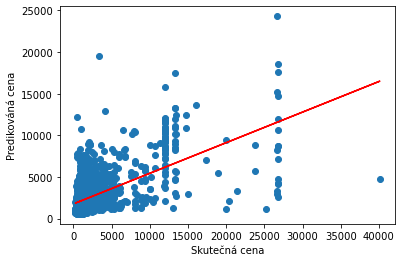

In [259]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y1)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, y1, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [327]:
from sklearn.neighbors import KNeighborsRegressor



knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

2188

In [328]:
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
print('rmse: ', rmse)

r2 = r2_score(y_test, y_pred)
print('r2 score: ', r2)

rmse:  80.85922606924643
r2 score:  0.34848568319146556


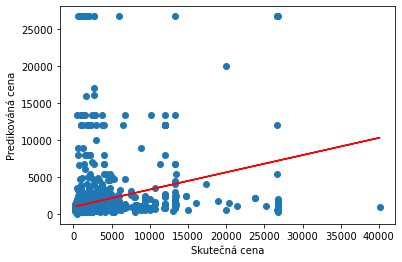

In [262]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [292]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, y_train)

C:\Users\mates\anaconda3\envs\bpEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor()

In [293]:
mlp_pred = model.predict(X_test)

In [294]:
mlpPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': mlp_pred})
mlpPred.head(30)

,ActualValues,PredictedValues
0,1001,5187.271743
1,500,2741.731909
2,1571,3299.834545
3,2000,1677.442826
4,1502,1844.733840
5,810,2819.227276
6,1452,1288.042167
7,1048,3856.100341
8,1788,1914.305929
9,1001,2304.050469


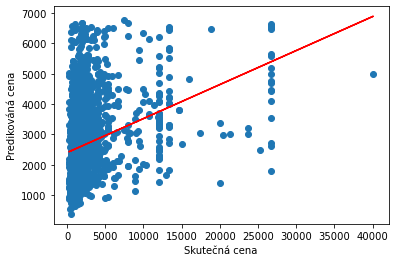

In [295]:
from matplotlib import pyplot as plt
plt.scatter(y_test, mlp_pred)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, mlp_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [296]:
rmse = np.sqrt(np.mean(mlp_pred - y_test)**2)
print('rmse: ', rmse)

r2 = r2_score(y_test, mlp_pred)
print('r2 score: ', r2)

rmse:  221.19051474930504
r2 score:  0.09418095403113425


In [350]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [355]:
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 8))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))

In [356]:
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')

In [357]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8750/8750 [==============================] - 1s 100us/step - loss: 1849.5793
Epoch 2/100
8750/8750 [==============================] - 1s 63us/step - loss: 1582.4685
Epoch 3/100
8750/8750 [==============================] - 1s 65us/step - loss: 1572.0573
Epoch 4/100
8750/8750 [==============================] - 1s 64us/step - loss: 1567.1533
Epoch 5/100
8750/8750 [==============================] - 1s 63us/step - loss: 1563.4580
Epoch 6/100
8750/8750 [==============================] - 1s 63us/step - loss: 1560.9297
Epoch 7/100
8750/8750 [==============================] - 1s 63us/step - loss: 1559.0424
Epoch 8/100
8750/8750 [==============================] - 1s 63us/step - loss: 1558.0958
Epoch 9/100
8750/8750 [==============================] - 1s 63us/step - loss: 1556.7153
Epoch 10/100
8750/8750 [==============================] - 1s 63us/step - loss: 1556.4538
Epoch 11/100
8750/8750 [==============================] - 1s 64us/step - loss: 1555.6525
Epoch 12/100
8750/8750 [=====

8750/8750 [==============================] - 1s 64us/step - loss: 1500.8838
Epoch 94/100
8750/8750 [==============================] - 1s 64us/step - loss: 1500.9512
Epoch 95/100
8750/8750 [==============================] - 1s 64us/step - loss: 1500.0444
Epoch 96/100
8750/8750 [==============================] - 1s 64us/step - loss: 1499.6878
Epoch 97/100
8750/8750 [==============================] - 1s 63us/step - loss: 1499.9759
Epoch 98/100
8750/8750 [==============================] - 1s 63us/step - loss: 1499.0545
Epoch 99/100
8750/8750 [==============================] - 1s 64us/step - loss: 1498.2704
Epoch 100/100
8750/8750 [==============================] - 1s 64us/step - loss: 1498.5734


In [358]:
y_pred = model.predict(X_test)

In [360]:
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)


r2 = r2_score(y_test, y_pred)
print('r2 score: ', r2)

print('mae: ', mean_absolute_error(y_test, y_pred))

mse:  11806852.201864837
r2 score:  0.03772047218558683
mae:  1363.733014579229


ValueError: Polynomial must be 1d only.

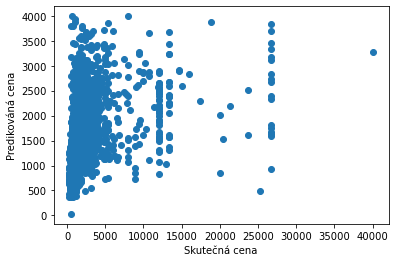

In [361]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Skutečná cena')
plt.ylabel('Predikováná cena')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()